In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
!pip install pygame

In [12]:
import gymnasium as gym
import gym_carla
from gym_carla.carla_env import CarlaEnv
import carla

In [13]:
import torch
torch.cuda.is_available()

True

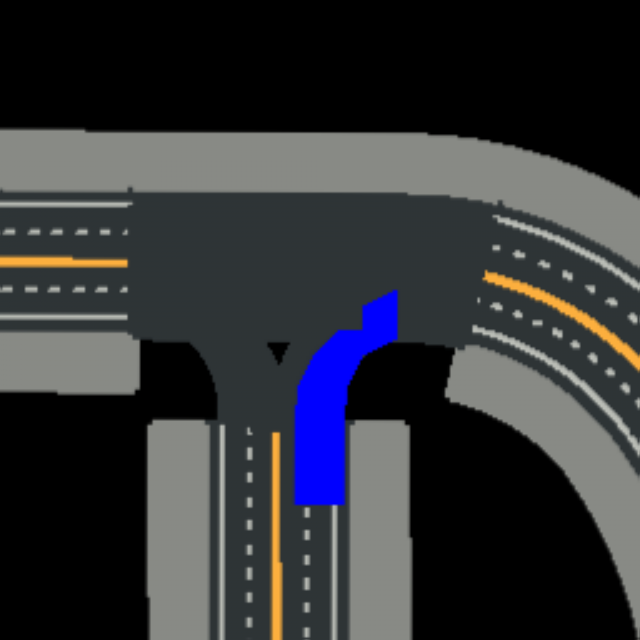

In [14]:
# parameters for the gym_carla environment
params = {
'display': True,
'display_size': 256,
'number_of_vehicles': 0,
'number_of_walkers': 0,
'display_size': 256,  # screen size of bird-eye render
'max_past_step': 1,  # the number of past steps to draw
'dt': 0.07,  # time interval between two frames
'discrete': True,  # whether to use discrete control space
# 'discrete_acc': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],  # discrete value of acceleration (postive) and brake (negative)
# 'discrete_steer': [-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0],  # discrete value of steering
'discrete_acc': [-0.2, -0.1, 0.0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
'discrete_steer': [-0.9, -0.6, -0.3, -0.15, 0.0, 0.15, 0.3, 0.6, 0.9],
'continuous_accel_range': [-1.0, 1.0],  # continuous acceleration range
'continuous_steer_range': [-1.0, 1.0],  # continuous steering angle range
'ego_vehicle_filter': 'vehicle.mini.cooper_s_2021',  # filter for defining ego vehicle
'port': 2000,  # connection port
'town': 'Town05',  # which town to simulate
'task_mode': 'random',  # mode of the task, [random, roundabout (only for Town03)]
    'max_time_episode': 10000,  # maximum timesteps per episode
'max_waypt': 7,  # maximum number of waypoints
'obs_range': 80,  # observation range (meter)
'lidar_bin': 0.125,  # bin size of lidar sensor (meter)
'd_behind': 12,  # distance behind the ego vehicle (meter)
'out_lane_thres': 2.0,  # threshold for out of lane
'desired_speed': 8,  # desired speed (m/s)
'max_ego_spawn_times': 200,  # maximum times to spawn ego vehicle
'display_route': True,  # whether to render the desired route
'pixor_size': 64,  # size of the pixor labels
'pixor': False,  # whether to output PIXOR observation
}

# Set gym-carla environment

env = CarlaEnv(params)
obs = env.reset()
# from timeit import default_timer
# init_time = default_timer()
# while default_timer() - init_time < 10:
#     action = [2.0, 0.0]
#     obs,r,done,info = env.step(action)

# if done:
#     obs = env.reset()
# env._set_synchronous_mode(False)

In [ ]:
env._set_synchronous_mode(False)

In [15]:
from stable_baselines3.common.env_checker import check_env
from stable_baselines3 import DQN, SAC

In [ ]:
check_env(env)

In [7]:
model = DQN("MultiInputPolicy", env, learning_rate=1e-2, buffer_size=10000, learning_starts=100, batch_size=12, train_freq=100, exploration_fraction=0.9, exploration_final_eps=0.5, optimize_memory_usage=False, device="cuda")

NameError: name 'DQN' is not defined

In [ ]:
model.learn(total_timesteps=100000)

In [ ]:
obs = env.reset()

while True:
    action = 75
    a, reward, c, d, e = env.step(action)
    print(reward)

if done:
    obs = env.reset()

In [ ]:
model.save('dqn_carla_test')
del model

In [16]:
model = DQN.load("dqn_carla_test")

In [ ]:
model.get_parameters()

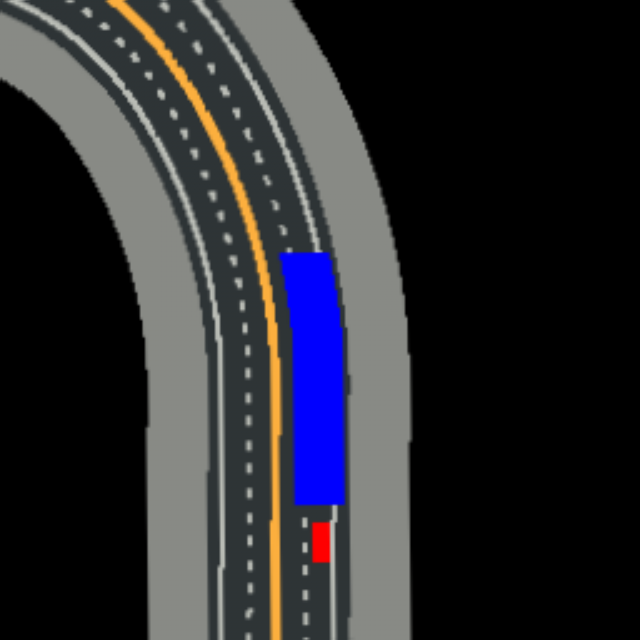

In [ ]:
while True:
    obs = env.reset()
    dones = False
    for i in range(2000):
        if(dones):
            break
        action = model.predict(obs[0] if i == 0 else obs)
        obs, rewards, dones, truncated, info = env.step(action[0]) 

In [9]:
model = DQN.load("dqn_carla_test", env=env, device='cuda')
model.learn(total_timesteps=100)

KeyboardInterrupt: 